<a href="https://colab.research.google.com/github/melvinaquartey/ml-homework/blob/main/Homework4Prob1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Homework 4
### Melvina Quartey RIN 662067086

Problem 1

In [ ]:
!pip install scikeras


170498071/170498071 [==============================] - 4s 0us/step


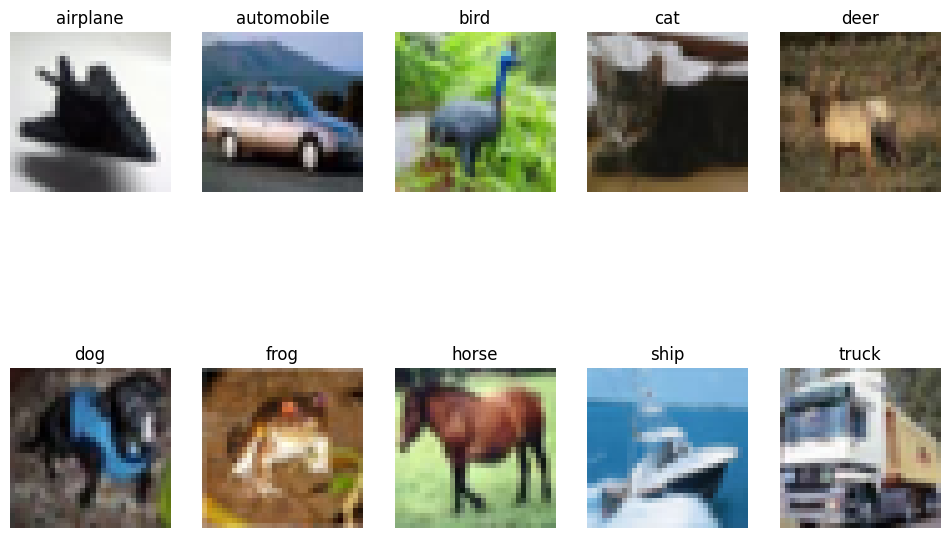

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(X_train_full, y_train_full), (_, _) = cifar10.load_data()

# Class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize one image from each category
plt.figure(figsize=(12, 8))
for i in range(10):
    class_indices = np.where(y_train_full == i)[0]
    sample_index = class_indices[0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[sample_index])
    plt.title(class_labels[i])
    plt.axis('off')
plt.show()




In [ ]:
# Split the full training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# One-hot encode the labels
num_classes = 10
y_train = np.eye(num_classes)[y_train.flatten()]
y_val = np.eye(num_classes)[y_val.flatten()]

# Define a function to create the neural network model with L2 regularization
def create_model_with_regularization(units=256, l2_lambda=0.01):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier object for use with GridSearchCV
model = KerasClassifier(model=create_model_with_regularization, l2_lambda=0.001, units=128, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'units': [128, 256, 512],
    'l2_lambda': [0.001, 0.01, 0.1]  # You can adjust the values of lambda for different regularization strengths
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_units = grid_result.best_params_['units']
best_l2_lambda = grid_result.best_params_['l2_lambda']

# Train the model with the best hyperparameters
best_model = create_model_with_regularization(units=best_units, l2_lambda=best_l2_lambda)
history = best_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))



Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .........................l2_lambda=0.001, units=128; total time=  16.3s
[CV] END .........................l2_lambda=0.001, units=128; total time=   5.9s
[CV] END .........................l2_lambda=0.001, units=128; total time=   5.2s
[CV] END .........................l2_lambda=0.001, units=256; total time=   6.0s
[CV] END .........................l2_lambda=0.001, units=256; total time=   5.9s
[CV] END .........................l2_lambda=0.001, units=256; total time=   5.9s
[CV] END .........................l2_lambda=0.001, units=512; total time=   5.7s
[CV] END .........................l2_lambda=0.001, units=512; total time=   6.3s
[CV] END .........................l2_lambda=0.001, units=512; total time=   5.4s
[CV] END ..........................l2_lambda=0.01, units=128; total time=   5.9s
[CV] END ..........................l2_lambda=0.01, units=128; total time=   5.9s
[CV] END ..........................l2_lambda=0.01

1094/1094 [==============================] - 3s 3ms/step - loss: 1.4185 - accuracy: 0.5326
Best Model Validation Accuracy: 0.4877333343029022
Best Model Validation loss: 1.5617412328720093
Best Model Training Accuracy: 0.5325714349746704
Best Model Training Loss: 1.4184678792953491


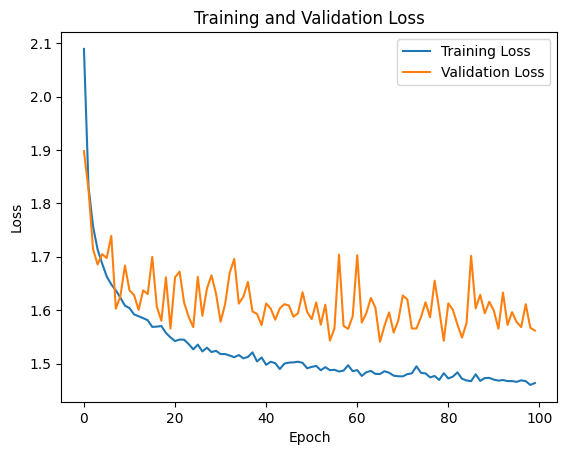

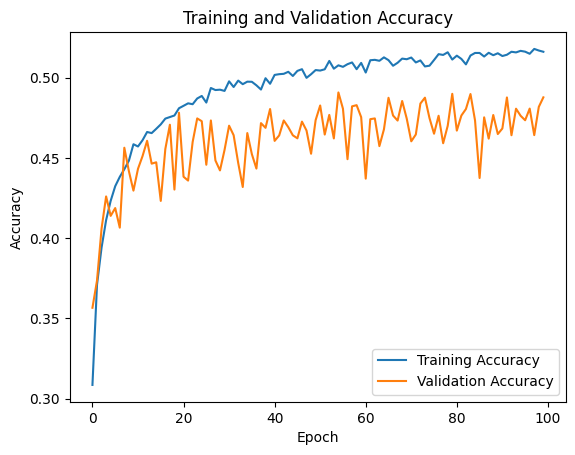

In [ ]:
# Evaluate the best model on the validation set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
loss, accuracy = best_model.evaluate(X_train, y_train)
print("Best Model Validation Accuracy:", val_accuracy)
print("Best Model Validation loss:", val_loss)
print("Best Model Training Accuracy:", accuracy)
print("Best Model Training Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
